# <center>  Visualizaciones para mostrar proporciones o Porcentajes en lugar de un gráfico circular </center> 
### Crear alternativas con Python para usar en lugar de gráficos circulares
<hr>


Un gráfico circular es un gráfico típico para mostrar las proporciones de datos categóricos. Básicamente, este es un gráfico circular dividido en secciones para mostrar la contribución proporcional de los datos en comparación con un total. Las áreas se pueden expresar en Porcentajes calculando el total de 360 ​​grados igual al 100%.

Este gráfico se usa con frecuencia en la visualización de datos, ya que el concepto es simple de crear y el resultado es fácil de entender.

Sin embargo, hay algunas cuestiones controvertidas. Algunas fuentes explican que es difícil para los humanos medir la cantidad de los cortes en el gráfico ( enlace https://scc.ms.unimelb.edu.au/resources/data-visualisation-and-exploration/no_pie-charts#:~:text=The%20quantities%20in%20each%20category,slices%20can%20be%20hard%20work.). Además, la información puede distorsionarse y engañar al lector ( enlace https://en.wikipedia.org/wiki/Misleading_graph#:~:text=Comparing%20pie%20charts%20of%20different,the%20sample%20size%20is%20small. ).

Afortunadamente, el gráfico circular no es la única opción que podemos usar. Hay varios gráficos que pueden expresar proporciones o Porcentajes. Este cuaderno lo guiará por nueve alternativas interesantes que pueden exhibir la misma dimensión de los datos que un gráfico circular.

¡¡Descargo de responsabilidad!!\
La intención de este cuaderno no va en contra del gráfico circular. Cada gráfico tiene sus pros y sus contras. El objetivo principal es guiar algunos gráficos que pueden expresar datos en proporciones o Porcentajes en comparación con un total.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




Para mostrar que el método mencionado en los "Cuadernos de profe Jorge Blanco" se puede aplicar a datos del mundo real, usaremos datos de una Lista de países por producción de carbón en Wikipedia(https://en.wikipedia.org/wiki/List_of_countries_by_coal_production). Este Notebook muestra una lista de países por producción de carbón superior a 5 millones de toneladas a partir de 2020.\
Pueden tomar como referencia el siguiente enlace para hacer Web Scraping a Wikipedia Table y convertirlo a un Dataframe.\
 https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451

In [8]:
import requests 
from bs4 import BeautifulSoup
wikiurl='https://en.wikipedia.org/wiki/List_of_countries_by_coal_production'
table_class='wikitable sortable jquery-tablesorter'

response=requests.get(wikiurl)

print(response.status_code)
#si imprime el código, 200: Indica que el servidor respondió satisfactoriamente a nuestra solicitud.

200


Después de la descarga, analice los datos descargados con BeautifulSoup\
(https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [9]:
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table',{'class':"wikitable"})

df_carbonall = pd.read_html(str(table))[0]
df_carbonall.head(5)

,Country,2021[1],2020[1],2019[1],2018[2],2017[3],2016[4],2015[5],2014[6],2013[4],2007[7]
0,China,4126.0,3901.6,3846.3,3697.7,3523.2,3411.0,3747.0,3874.0,3974.3,2536.7
1,India,762.0,719.8,730.3,760.4,716.0,692.4,677.5,648.1,608.5,478.2
2,Indonesia,614.0,563.7,616.2,557.8,461.0,434.0,392.0,458.0,474.6,174.8
3,United States,523.8,485.7,640.8,686.0,702.3,660.6,812.8,906.9,893.4,1039.2
4,Australia,467.1,499.8,511.7,502.0,481.3,492.8,484.5,503.2,472.8,393.9


In [10]:
list_country = ['Russia', 'Germany', 'Poland', 'Colombia',
                'Ukraine', 'Romania', 'Greece', 'Bulgaria']

In [11]:
df_carbonpre = df_carbonall[df_carbonall['Country'].isin(list_country)]
df_carbonpre = df_carbonpre.iloc[:,0:2]
df_carbonpre.rename(columns={'2020[1]':'2020'}, inplace=True)
df_carbonpre.reset_index(drop=True, inplace=True)
df_carbonpre

,Country,2021[1]
0,Russia,435.3
1,Germany,126.3
2,Poland,107.4
3,Colombia,56.2
4,Bulgaria,28.3
5,Ukraine,24.9
6,Romania,17.7
7,Greece,12.1


In [12]:
df_carbon = pd.melt(df_carbonpre, id_vars=['Country'],
                  value_vars='2020',
                  var_name='Year', value_name='Value')

df_carbon['Porcentaje'] = [round(i*100/sum(df_carbon.Value),1) for i in df_carbon.Value]
df_carbon

,Country,Year,Value,Porcentaje
0,Russia,2021[1],435.3,53.9
1,Germany,2021[1],126.3,15.6
2,Poland,2021[1],107.4,13.3
3,Colombia,2021[1],56.2,7.0
4,Bulgaria,2021[1],28.3,3.5
5,Ukraine,2021[1],24.9,3.1
6,Romania,2021[1],17.7,2.2
7,Greece,2021[1],12.1,1.5


En este cuaderno, seleccionaremos algunos países con la cantidad de producción de carbón en 2020. Por ejemplo, los países seleccionados son Rusia, Alemania, Polonia, china, Estados unidos, India, y Colombia.

Si desea seleccionar otros países o cambiar el año, no dude en modificar los códigos.

In [13]:
lista_Paises = ['Russia', 'Germany', 'Poland', 'China', 'United States', 'India', 'Colombia']

In [14]:
lista_Paises

['Russia', 'Germany', 'Poland', 'China', 'United States', 'India', 'Colombia']

In [15]:
df_carbonpre = df_carbonall[df_carbonall['Country'].isin(list_country)]
df_carbonpre = df_carbonpre.iloc[:,0:2]
df_carbonpre.rename(columns={'2020[1]':'2020'}, inplace=True)
df_carbonpre.reset_index(drop=True, inplace=True)
df_carbonpre

,Country,2021[1]
0,Russia,435.3
1,Germany,126.3
2,Poland,107.4
3,Colombia,56.2
4,Bulgaria,28.3
5,Ukraine,24.9
6,Romania,17.7
7,Greece,12.1


Derrita o funda (melt) el marco de datos y cree una columna de Porcentaje para usar más adelante

In [16]:
df_carbon = pd.melt(df_carbonpre, id_vars=['Country'],
                  value_vars='2020',
                  var_name='Year', value_name='Value')

df_carbon['Porcentaje'] = [round(i*100/sum(df_carbon.Value),1) for i in df_carbon.Value]
df_carbon

,Country,Year,Value,Porcentaje
0,Russia,2021[1],435.3,53.9
1,Germany,2021[1],126.3,15.6
2,Poland,2021[1],107.4,13.3
3,Colombia,2021[1],56.2,7.0
4,Bulgaria,2021[1],28.3,3.5
5,Ukraine,2021[1],24.9,3.1
6,Romania,2021[1],17.7,2.2
7,Greece,2021[1],12.1,1.5


Antes de continuar, tracemos un gráfico circular para compararlo con el resultado obtenido 
 más adelante.

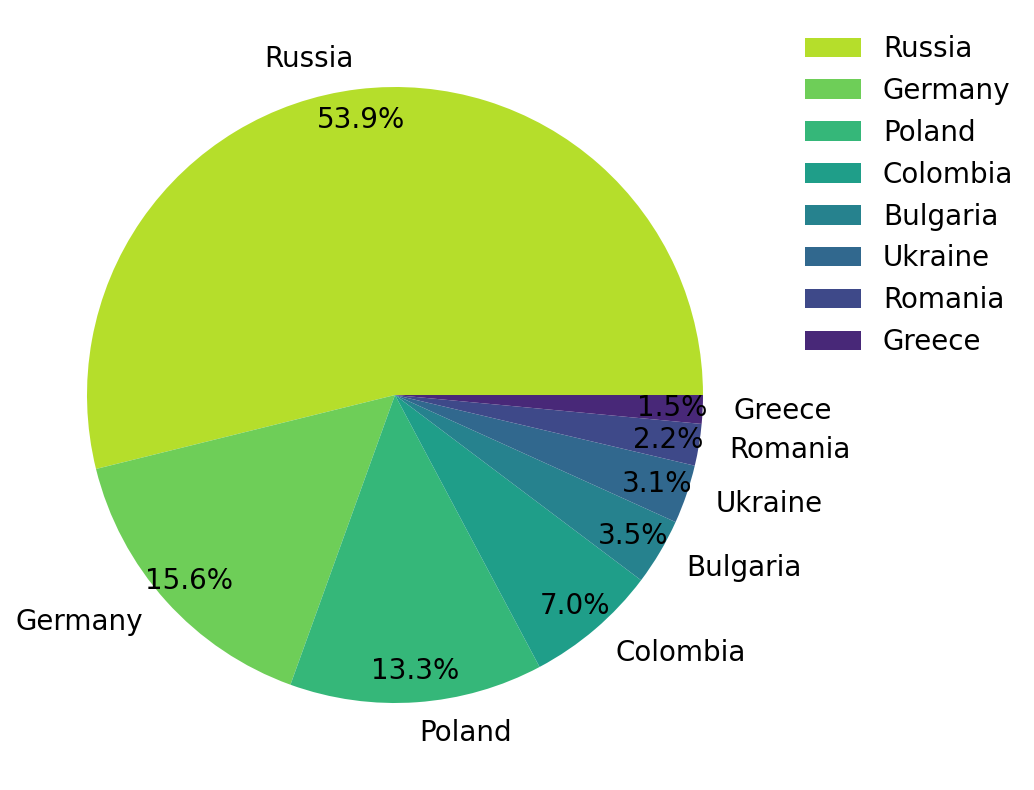

In [17]:
#Obtener una lista de colores, el nombre de la paleta se puede cambiar
pal_ = list(sns.color_palette(palette='viridis_r', # pruebe con otras paletas de colores
                              n_colors=len(list_country)).as_hex())
#plot a pie chart
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 20})
plt.pie(df_carbon.Value,
        labels= df_carbon.Country,
        colors=pal_, autopct='%1.1f%%',
        pctdistance=0.9)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()

El gráfico circular muestra las proporciones de los países europeos y colombia con una producción de carbón superior a 5 millones de toneladas en 2020. Los Porcentajes se comparan con otros países en el conjunto de datos seleccionado.

### Visualización de datos
Este Notebook cubrirá 9 visualizaciones para usar en lugar de un gráfico circular. Estas alternativas se pueden clasificar en dos grupos:

#### Gráficos circulares

* Gráfico con mancuernas (también conocido como gráfico con barra)
* Gráfico de burbujas
* Embalaje circular
* Gráfico circular interactivo
* Gráfico de anillos interactivo\
\
### Otras formas

* Mapa de árbol
* Gráfico de gofres
* Gráfico de barras
* Gráfico de barras apiladas

### 1 Comparación de cada categoría con un gráfico con mancuernas (también conocido como gráfico con barra)

Un gráfico con mancuernas es un gráfico para comparar dos puntos de datos. Como se mencionó anteriormente, comparar sectores en un gráfico circular puede ser difícil. Podemos hacer la comparación para cada categoría con un gráfico con mancuernas.

El gráfico de mancuernas consta de dos gráficos circulares unificados con una línea recta. Normalmente, el gráfico Dumbell se usa para comparar valores de datos. Estableceremos el rango del eje X de 0 a 100 por ciento para mostrar los Porcentajes de producción de carbón.

Por ejemplo, podemos comparar países o mostrar el Porcentaje de cada país en comparación con el resto. En primer lugar, crearemos otro DataFrame para aplicar con el gráfico de mancuernas.

In [18]:
df_select = df_carbon[['Country', 'Porcentaje']]
df_select['Label_color'] = [i for i in df_carbon['Country']]

df_carbonmod = df_carbon[['Country']]
df_carbonmod['Porcentaje'] = [100-i for i in df_carbon['Porcentaje']]
df_carbonmod['Label_color'] = ['Otros Países']*len(list_country)

df_db = pd.concat([df_select, df_carbonmod],axis=0)
df_db

/var/folders/cr/4_w97xp57b7dq8c62j_qvjgc0000gn/T/ipykernel_20564/1040890733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Label_color'] = [i for i in df_carbon['Country']]
/var/folders/cr/4_w97xp57b7dq8c62j_qvjgc0000gn/T/ipykernel_20564/1040890733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbonmod['Porcentaje'] = [100-i for i in df_carbon['Porcentaje']]
/var/folders/cr/4_w97xp57b7dq8c62j_qvjgc0000gn/T/ipykernel_20564/1040890733.py:6: SettingWithCopyWarning: 
A value is trying 

,Country,Porcentaje,Label_color
0,Russia,53.9,Russia
1,Germany,15.6,Germany
2,Poland,13.3,Poland
3,Colombia,7.0,Colombia
4,Bulgaria,3.5,Bulgaria
5,Ukraine,3.1,Ukraine
6,Romania,2.2,Romania
7,Greece,1.5,Greece
0,Russia,46.1,Otros Países
1,Germany,84.4,Otros Países


Grafiquemos los dos países con la mayor producción de carbón en 2020

In [19]:
# Crear un diccionario para colorear cada país
color_country = dict(zip(list_country,pal_))
# Añadir un color al diccionario
color_country['Otros Países'] = '#b9b9b9'

# Seleccione países y agregue una columna para establecer el valor del eje Y
df_ = df_select.iloc[0:2,:]
df_['Y'] = [1]*len(df_)

import plotly.express as px
fig = px.scatter(df_, x='Porcentaje', y='Y', color='Label_color',
                 text = [str(i)+' %' for i in df_.Porcentaje][0:len(df_)],
                 opacity=1,
                 color_discrete_map=color_country)

fig.update_layout(width = 950, height = 300, plot_bgcolor = 'white',
                  margin = dict(t=40, l=20, r=20, b=20),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Countries'),
                  showlegend=True)

for c in list_country:
    df = df_[df_['Country']==c]
    fig.add_shape(type="line", layer="below",
                  line=dict(color='black', width=6),
                  y0=1, x0=list(df_.Porcentaje)[0],
                  y1=1, x1=list(df_.Porcentaje)[1])

fig.update_traces(textposition='top center', marker={'size':65},
                  textfont=dict(color='black'))
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=True, showgrid =False, range=[-1, 101]) 
fig.show()

/var/folders/cr/4_w97xp57b7dq8c62j_qvjgc0000gn/T/ipykernel_20564/3150109619.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Y'] = [1]*len(df_)


El gráfico de mancuernas compara dos países europeos con la mayor producción de carbón en 2020 del conjunto de datos seleccionado.\
\
Ahora trazar el Porcentaje de cada país en comparación con otros países

In [20]:

color_country = dict(zip(list_country,pal_))

color_country['Otros Países'] = '#b9b9b9'

import plotly.express as px
fig = px.scatter(df_db, x='Porcentaje', y='Country', color='Label_color',
                 text = [str(i)+' %' for i in df_db.Porcentaje],
                 opacity=1,
                 color_discrete_map=color_country)

fig.update_layout(width = 950, height = 900, plot_bgcolor = 'white',
                  margin = dict(t=40, l=20, r=20, b=20),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Countries'),
                  showlegend=True)

for c in list_country:
    df = df_db[df_db['Country']==c]
    fig.add_shape(type="line", layer="below",
                  line=dict(color=color_country.get(c), width=10),
                  y0=c, x0=list(df.Porcentaje)[0],
                  y1=c, x1=list(df.Porcentaje)[1])

fig.update_traces(textposition='top center', marker={'size':50},
                  textfont=dict(color='black'))
fig.update_yaxes(title='', visible=True, showgrid =False)
fig.update_xaxes(visible=False) 
fig.show()

El gráfico con mancuernas muestra los Porcentajes de la producción de carbón de cada país europeo y Colombia por ser uno de los mayores productores de carbón, en comparación con los datos de otros países en el conjunto de datos seleccionado.\
\
El resultado se ve bien, sin embargo, los puntos de datos son todos iguales. Esto puede ser un inconveniente para comparar entre países. Podemos mejorar el resultado cambiando el tamaño circular de acuerdo con los valores porcentuales y hacer que la visualización sea más intuitiva. Los diferentes tamaños ayudarán a comparar los Porcentajes de las categorías.

In [21]:
import plotly.express as px
fig = px.scatter(df_db, x='Porcentaje', y='Country', color='Label_color',
                 text = [str(i)+' %' for i in df_db.Porcentaje],
                 size = 'Porcentaje', size_max=45,
                 opacity=1,
                 color_discrete_map=color_country)

fig.update_layout(width = 950, height = 900, plot_bgcolor = 'white',
                  margin = dict(t=40, l=20, r=20, b=20),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Countries'),
                  showlegend=True)

for c in list_country:
    df = df_db[df_db['Country']==c]
    fig.add_shape(type="line", layer="below",
                  line=dict(color=color_country.get(c), width=6),
                  y0=c, x0=list(df.Porcentaje)[0],
                  y1=c, x1=list(df.Porcentaje)[1])

fig.update_traces(textposition='top center',
                  textfont=dict(color='black'))

fig.update_yaxes(title='', visible=True, showgrid =False)
fig.update_xaxes(visible=False) 
fig.show()

El gráfico con mancuernas muestra los Porcentajes de la producción de carbón de cada país europeo y Colombia en comparación con los datos de otros países. \
\
### 2 Uso de áreas circulares con un gráfico de burbujas

En lugar de un solo círculo en un gráfico circular, podemos usar varios círculos de un gráfico de burbujas. Básicamente, un gráfico de burbujas es un diagrama de dispersión con diferentes tamaños de puntos de datos. Esta es una gráfica ideal para mostrar datos tridimensionales, valor X, valor Y y tamaño de datos.\
\
Lo bueno de usar un gráfico de burbujas como alternativa a un gráfico circular es que no tenemos que preocuparnos por los valores X e Y. Las burbujas se pueden ubicar de la forma que queramos. Por ejemplo, tracemos las burbujas horizontalmente.\
\
Ordenar los valores antes de graficar hará que el resultado se vea organizado.

Agregar columnas X e Y

In [22]:
df_carbon['Y'] = [1]*len(df_carbon)
list_x = list(range(0,len(df_carbon)))
df_carbon['X'] = list_x
df_carbon

,Country,Year,Value,Porcentaje,Y,X
0,Russia,2021[1],435.3,53.9,1,0
1,Germany,2021[1],126.3,15.6,1,1
2,Poland,2021[1],107.4,13.3,1,2
3,Colombia,2021[1],56.2,7.0,1,3
4,Bulgaria,2021[1],28.3,3.5,1,4
5,Ukraine,2021[1],24.9,3.1,1,5
6,Romania,2021[1],17.7,2.2,1,6
7,Greece,2021[1],12.1,1.5,1,7


In [23]:
#crear una lista de etiquetas para cada burbuja
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(df_carbon.Country,
                                                            df_carbon.Value,
                                                            df_carbon.Porcentaje)]
fig = px.scatter(df_carbon, x='X', y='Y',
                 color='Country', color_discrete_sequence=pal_,
                 size='Value', text=label, size_max=90
                )
fig.update_layout(width=900, height=320,
                  margin = dict(t=50, l=0, r=0, b=0),
                  showlegend=False
                 )
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

El gráfico de burbujas muestra los países con una producción de carbón superior a 10 millones de toneladas en 2020. 
\
Una preocupación de aplicar el gráfico de burbujas es el espacio de trazado. Cuantos más círculos se trazan, más área se necesita.\
\
### 3 Organizar las burbujas con empaque circular

Un empaque circular consiste en unificar varios círculos con menos espacios y sin áreas superpuestas. Esta técnica ayuda a ahorrar espacio de trazado cuando se trabaja con muchos gráficos circulares.

Una desventaja del empaquetado circular es que puede ser difícil determinar la diferencia entre las burbujas que tienen tamaños similares. Una solución fácil es etiquetar cada círculo con su información.

Necesitamos calcular el tamaño y la posición de cada círculo antes de trazar. Afortunadamente, se puede usar una biblioteca llamada circlify para facilitar el cálculo.

In [24]:
pip install circlify


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
import circlify
# compute circle positions:
circles = circlify.circlify(df_carbon['Value'].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

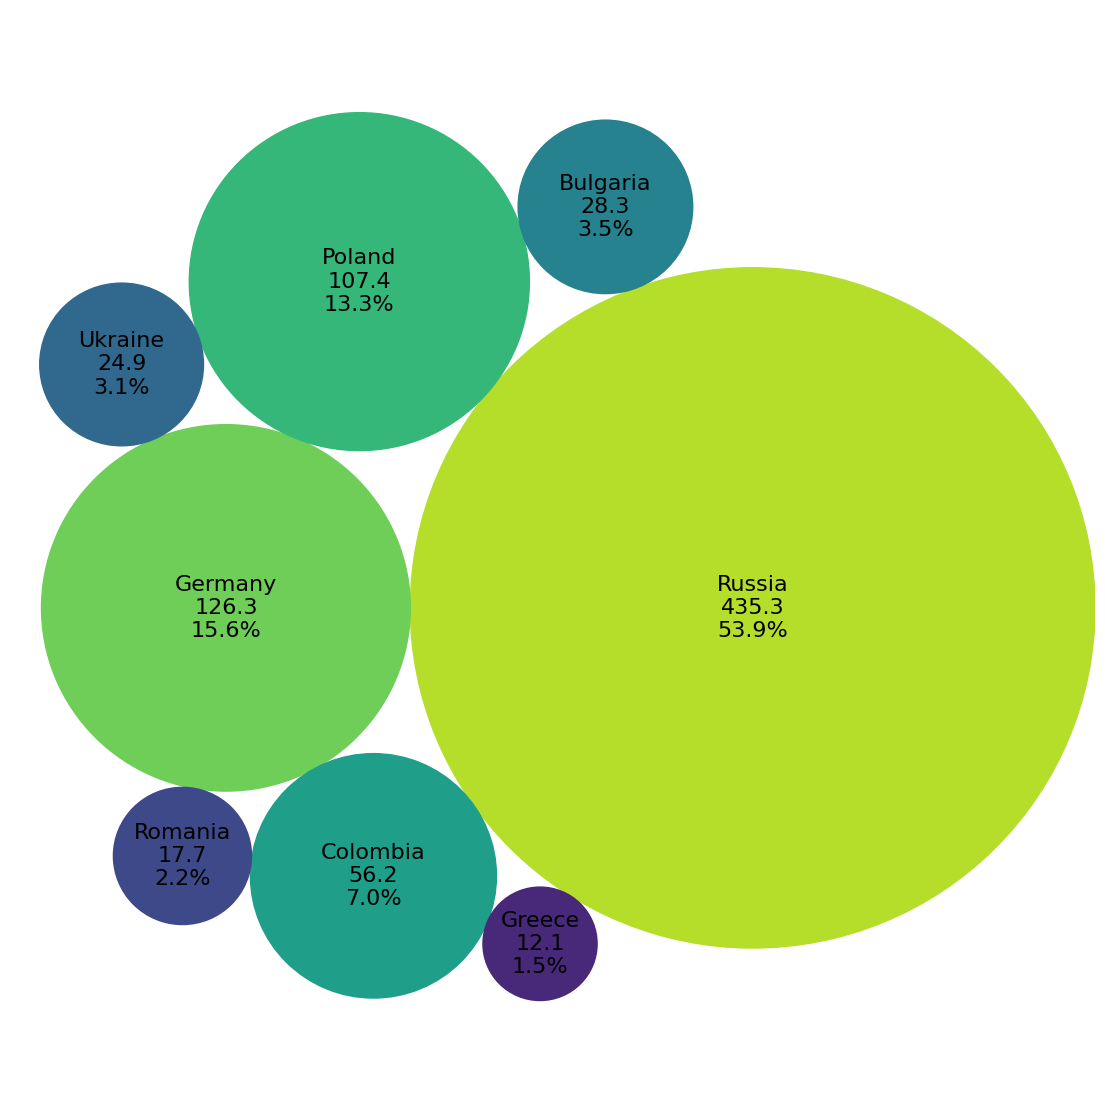

In [26]:
#create a laebls list for each bubble 
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(df_carbon.Country,
                                                            df_carbon.Value,
                                                            df_carbon.Porcentaje)]
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, note, color in zip(circles, label, pal_):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color = color))
    plt.annotate(note.replace('<br>','\n'), (x,y), size=16, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

### 4. Insiste en utilizar gráficas circulares? No hay problema... Hagamos un gráfico circular interactivo!!!.

Aunque un gráfico circular tiene algunos inconvenientes, como se mencionó anteriormente, no podemos negar que es fácil de entender. Conocer a tu audiencia es imprescindible. Si sus lectores no están acostumbrados a los gráficos complejos, un gráfico circular sigue siendo una buena opción para comunicar la información.

Podemos hacer un gráfico circular interactivo para mejorar uno típico. Al hacer esto, los lectores pueden filtrar y jugar con el gráfico para obtener los datos que desean. Sin embargo, a veces, los lectores pueden no saber acerca de las funciones. Debe haber instrucciones o notas para informar cómo usarlo.

In [27]:
fig = px.pie(df_carbon, values='Value', names='Country',
             color_discrete_sequence=pal_)
fig.update_layout(width = 700, height = 500,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.update_traces(textfont_size=10)
fig.show()

El gráfico circular interactivo muestra cada país con una producción de carbón superior a 10 millones de toneladas en 2020. 

### 5 Recortar el centro para crear un gráfico de anillos interactivo

En la práctica, un gráfico de anillos es un gráfico circular con el centro en blanco. Por cierto, algunas fuentes explican que tiene algunas ventajas sobre el gráfico circular, como que facilita la narración de los lectores o se puede añadir más información al centro ( enlace1 https://moqups.com/templates/charts-graphs/pie-donut-chart/ y enlace2 https://datavizcatalogue.com/methods/donut_chart.html).

El gráfico de anillos interactivo comparte algunas ventajas y desventajas con el gráfico circular interactivo.

In [28]:

import plotly.express as px
fig = px.pie(df_carbon, values='Value', names='Country',
             color_discrete_sequence=pal_)
fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

### 6 Uso de áreas rectangulares con Treemap

Teóricamente, un mapa de árbol es una visualización para mostrar datos jerárquicos. Dentro de un rectángulo grande, se usan múltiples áreas rectangulares para comparar las proporciones. Aunque nuestros datos no tienen jerarquía, aún podemos aplicar el método para mostrar la contribución proporcional.

Al igual que el gráfico circular, la suma del área total es igual al 100 por ciento.

Una cosa a tener en cuenta es que si hay demasiadas categorías o diferencias entre valores, las áreas pequeñas pueden ser difíciles de distinguir de las demás.

Trazar un mapa de árbol

In [29]:

color_country['(?)'] = '#e9e9e9'

Label_per = [str(round(i*100/sum(df_carbon.Value),1))+' %' for i in df_carbon.Value]


fig = px.treemap(df_carbon, path=[px.Constant('2022'), 'Country'],
                 values=df_carbon.Porcentaje,
                 color=df_carbon.Country,
                 color_discrete_map=color_country,
                 hover_name=Label_per,
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), showlegend=True)
fig.show()

### 7 Combinando pequeños rectángulos con un gráfico de Waffle

Hemos trabajado con un gráfico circular y de anillos; ahora es el momento para un gráfico de Waffle . Con el nombre elegante, este gráfico combina múltiples rectángulos pequeños del mismo tamaño en un gran gráfico rectangular.

El gráfico de Waffle generalmente se usa para mostrar el Porcentaje de progreso de una tarea. Así, podemos aplicar el concepto para mostrar los Porcentajes de datos categóricos.

Trazar un gráfico de Waffle

In [30]:
pip install pywaffle


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


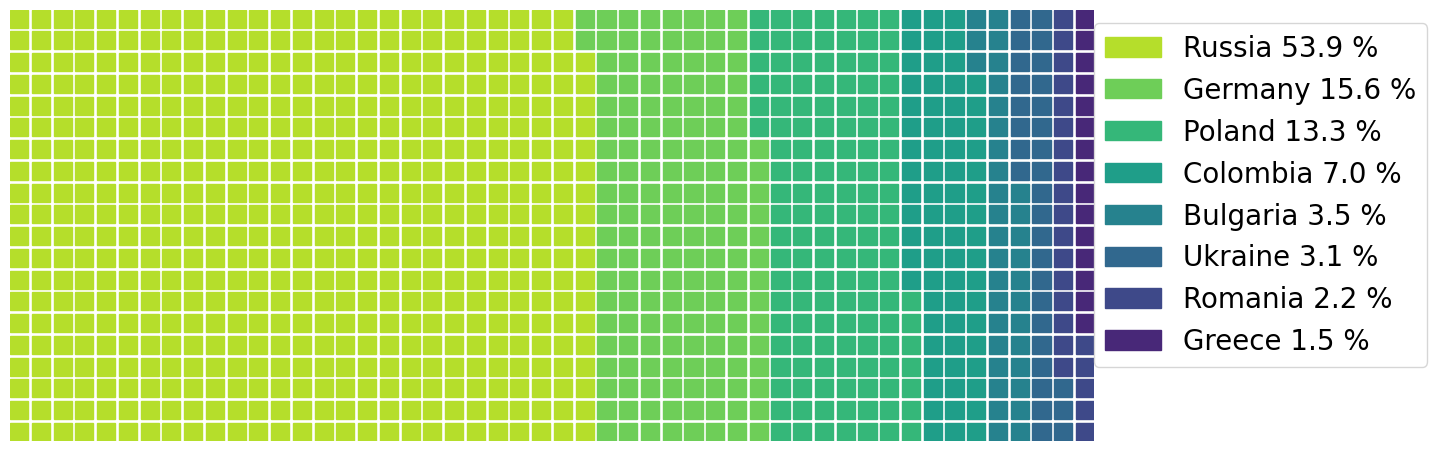

In [31]:

from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle, 
                 rows=20, columns=50,
                 values=df_carbon.Porcentaje, 
                 colors=pal_,
                 labels=[i+' '+j for i,j in zip(df_carbon.Country, Label_per)],
                 figsize = (15,6),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.32, 1),
                        })
plt.tight_layout()
plt.show()

Aunque el resultado se ve bien, se puede notar que puede ser difícil distinguir entre colores cercanos. Esto puede ser un inconveniente de aplicar el gráfico de Waffle con muchos datos categóricos.

Para hacer frente al problema, podemos trazar el Porcentaje de cada categoría y combinarlos como un collage de fotos. Tenga en cuenta que el resultado del código a continuación se exportará a la super HP computadora  para importarlo más tarde.

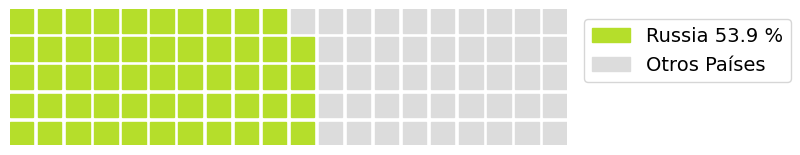

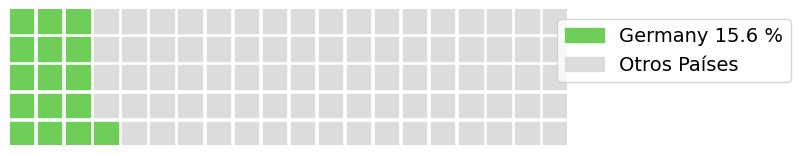

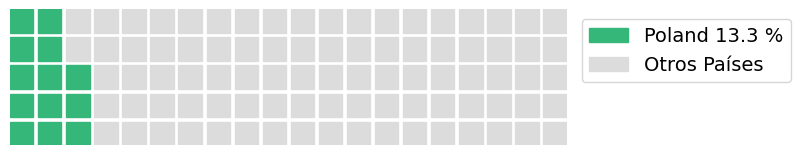

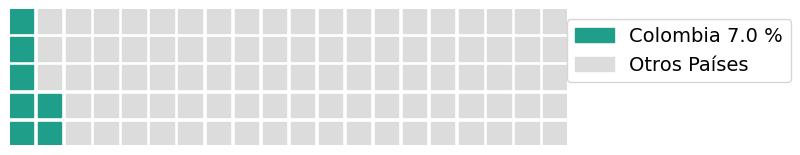

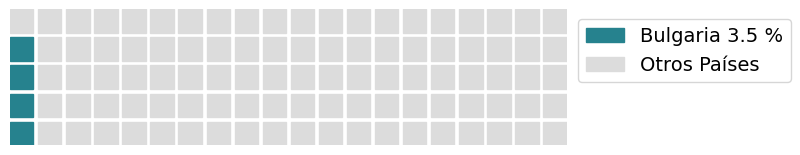

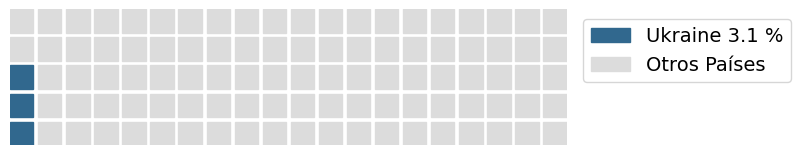

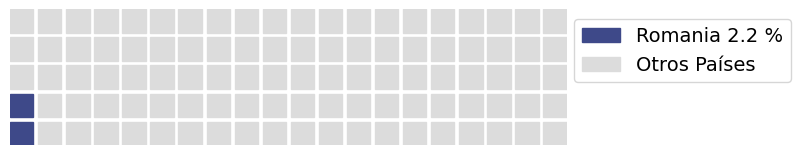

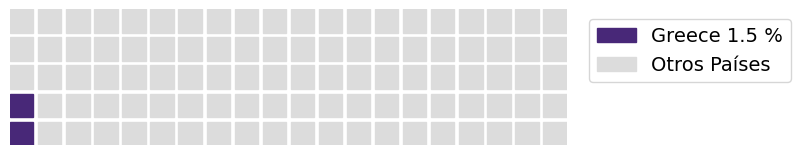

In [32]:
keep_sname = []
plt.rcParams['savefig.facecolor']='white'
for per, country, color in zip(df_carbon.Porcentaje, df_carbon.Country, pal_):
    fig = plt.figure(FigureClass=Waffle,
                     rows=5, columns=20,
                     values=[per, 100 - float(per)], 
                     colors=[color,'gainsboro'],
                     labels=[country + ' ' + str(per) +' %','Otros Países'],
                     figsize = (9,9),
                     legend={'loc':'upper right', 'bbox_to_anchor': (1.42, 1), 'fontsize':14}
                    )
    keep_sname.append('waffle_2020_'+ country + '.png')
    plt.tight_layout()
    plt.savefig('waffle_2020_'+ country + '.png', bbox_inches='tight')   #export_fig
    plt.show()

Defina una función para crear un collage de fotos. Mire este excelente código a continuación para combinar las tramas de Stack Overflow ( enlace  https://stackoverflow.com/questions/35438802/making-a-collage-in-pil).

In [33]:
from PIL import Image
def get_collage(cols_n, rows_n, width, height, input_sname, save_name):
    # Ancho = ancho del collage // alto = alto del collage 
    # #ambos se pueden calcular multiplicando cada tamaño de foto con el número de filas y columnas de la salida deseada
    c_width = width//cols_n
    c_height = height//rows_n
    size = c_width, c_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    
    for p in input_sname:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i, x, y = 0,0,0
    
    for col in range(cols_n):
        for row in range(rows_n):
            print(i, x, y)
            try:
                new_im.paste(ims[i], (x, y))
                i += 1
                y += c_height
            except IndexError:
                pass
        x += c_width
        y = 0
    new_im.save(save_name)

Aplicar la función

In [34]:
# para crear un collage de fotos adecuado: 
# ancho = número de columnas * ancho de la figura 
# altura = número de filas * altura de la figura
get_collage(1, 7, 644, 123*7, keep_sname, 'collage_waffle.png')

0 0 0
1 0 123
2 0 246
3 0 369
4 0 492
5 0 615
6 0 738




### 8 Volver a lo básico con un gráfico de barras

Otro gráfico típico es un gráfico de barras, que es un gráfico bidimensional con barras rectangulares en el eje X o el eje Y. Estas barras se utilizan para analizar valores de datos comparando sus alturas o longitudes. En comparación con el gráfico circular, el gráfico de barras requiere más espacio para manejar una gran cantidad de categorías.\

 Ahora vamos a mejorar un gráfico de barras normal utilizando Plotly para mostrar información al pasar el cursor sobre las barras. Se recomienda ordenar los datos antes de graficarlos para facilitar el análisis.

Una ventaja de crear un gráfico de barras interactivo es que las categorías con texto de anotación pequeño se pueden leer más fácilmente al pasar el cursor sobre cada barra.

In [35]:

color_country['Otros Países'] = '#dcdcdc'

import plotly.express as px
fig = px.bar(df_db, y='Country', x='Porcentaje', color='Label_color',
             text=[i+' '+str(j)+' %' if i != 'Otros Países' else '' for i,j in zip(df_db.Label_color,
                                                                                      df_db.Porcentaje)],
             orientation='h',
             color_discrete_map=color_country
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Countries'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### 9 Ahorro de espacio con un gráfico de barras apiladas

Un gráfico de barras apiladas es un tipo de gráfico de barras que muestra las proporciones de puntos de datos individuales en comparación con un total. A partir del concepto, aplicaremos un gráfico de barras apiladas para mostrar las proporciones de los datos que tenemos. El área total es igual al 100 por ciento.

Tiene el mismo problema que un gráfico de barras. Las áreas pequeñas pueden ser difíciles de leer si hay demasiadas categorías o diferencias entre categorías. La creación de un gráfico de barras apiladas interactivo ayudará a mostrar información al pasar el cursor sobre el área.

Trazar el gráfico de barras apiladas

In [36]:
fig = px.bar(df_carbon, y='Year', x='Porcentaje', color='Country',
             text = [i + str(j)+' %' for i,j in zip(df_carbon.Country, df_carbon.Porcentaje)],
             orientation='h',color_discrete_sequence=pal_)
fig.update_layout(width =800, height = 360, plot_bgcolor = 'white',
                  margin = dict(t=40, l=20, r=20, b=20),
                  #title_text = '2020',
                  showlegend=False)
fig.update_traces(textposition='inside')
fig.update_xaxes(visible=False)   
fig.update_yaxes(visible=False)
fig.show()

Podemos notar que, en este caso, el gráfico de barras apiladas puede guardar el área de trazado en comparación con el gráfico de barras.

### Resumen
El gráfico circular es típico en la visualización de datos. Tiene algunas ventajas, como ahorrar espacio de trazado y ser fácil de entender. Sin embargo, nada es perfecto. Hay algunos inconvenientes, como que a los lectores les resulta difícil estimar la cantidad y la información puede distorsionarse.

Este Cuadernillo perdon Notebook ha mostrado las 9 alternativas que se pueden utilizar en lugar de un gráfico circular. Tenga en cuenta que también tienen sus pros y sus contras.



Por último, el gráfico de barras es otro gráfico que se usa con frecuencia, así como el gráfico circular. Por cierto, el uso de demasiados gráficos de barras puede resultar en una visualización aburrida. 

#Examen final final!!!
Apreciados estudiantes! Quiero que sepan que están en el camino correcto hacia el éxito. Al tomar la decisión de estudiar la especialización en Big Data, han dado un gran paso hacia el futuro. Este laboratorio les brindará la oportunidad de demostrar sus habilidades para analizar y presentar información de manera efectiva utilizando diferentes tipos de gráficos y visualizaciones alternativas. Estoy seguro de que son capaces de crear un cuaderno o jupyter notebook utilizando datos reales y mostrando su creatividad al utilizar visualizaciones alternativas que no son las comúnmente utilizadas. 
¡Los invito a seguir adelante con dedicación y perseverancia, porque estoy seguro de que lograrán grandes cosas en este camino!

 al exámen final de Visualización de Datos! En este taller de visualización de datos, aprenderemos a crear gráficos alternativos al gráfico circular utilizando como referencia la tabla de población de los departamentos de Colombia que se encuentra en el siguiente enlace: https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_poblaci%C3%B3n

Para comenzar, crearemos un nuevo Jupyter Notebook y lo guardaremos en el entorno de creación (Directorio de trabajo actual). Luego, se apoyan en este cuaderno "Circulares_1A.ipynb" para importar las mismas librerias y desarrollar unicamente todas las 9 visualizaciones alternativas a las gráficas circulares.

Cáda visualización debe ser analizada y contener una breve descripción, tenga en cuenta que esta información va para un público en general.






$Jorge\ I.\ Blanco$

 $2023$

